# Apple Stock Price Analysis

Apple Inc. (AAPL) is one of the most valuable publicly traded companies.
This project analyzes Apple’s historical stock price data to understand
its performance, volatility, and return behavior over time using Python.

## Objective

The goal of this project is to:
- Analyze Apple’s historical stock price trends
- Measure daily returns and volatility
- Use moving averages to identify long-term trends
- Evaluate cumulative returns over time

## Libraries Used

- pandas: data manipulation
- numpy: numerical computations
- matplotlib & seaborn: data visualization

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("default")


## Data Loading

The dataset contains daily Apple stock prices including Open, High, Low,
Close prices and trading volume.

In [61]:
df = pd.read_csv("AAPL.csv",skiprows=[1])

,Date,Adj Close,Close,High,Low,Open,Volume
0,1/2/2020,72.796013,75.087502,75.150002,73.797501,74.059998,135480400
1,1/3/2020,72.088287,74.357498,75.144997,74.125000,74.287498,146322800
2,1/6/2020,72.662712,74.949997,74.989998,73.187500,73.447502,118387200
3,1/7/2020,72.320961,74.597504,75.224998,74.370003,74.959999,108872000
4,1/8/2020,73.484360,75.797501,76.110001,74.290001,74.290001,132079200
...,...,...,...,...,...,...,...
1232,11/22/2024,229.869995,229.869995,230.720001,228.059998,228.059998,38168300
1233,11/25/2024,232.869995,232.869995,233.250000,229.740005,231.460007,90152800
1234,11/26/2024,235.059998,235.059998,235.570007,233.330002,233.330002,45986200
1235,11/27/2024,234.929993,234.929993,235.690002,233.809998,234.470001,33498400


## Data Overview

We inspect the dataset structure, data types, and summary statistics.

In [62]:
print(df.head())
print(df.info())
print(df.describe())

       Date  Adj Close      Close       High        Low       Open     Volume
0  1/2/2020  72.796013  75.087502  75.150002  73.797501  74.059998  135480400
1  1/3/2020  72.088287  74.357498  75.144997  74.125000  74.287498  146322800
2  1/6/2020  72.662712  74.949997  74.989998  73.187500  73.447502  118387200
3  1/7/2020  72.320961  74.597504  75.224998  74.370003  74.959999  108872000
4  1/8/2020  73.484360  75.797501  76.110001  74.290001  74.290001  132079200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1237 non-null   object 
 1   Adj Close  1237 non-null   float64
 2   Close      1237 non-null   float64
 3   High       1237 non-null   float64
 4   Low        1237 non-null   float64
 5   Open       1237 non-null   float64
 6   Volume     1237 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.8+ KB
Non

## Data Preprocessing

- Convert Date column to datetime
- Sort data by date
- Set Date as index for time-series analysis

In [63]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df['Percentage every day'] = df['Close'].pct_change()
df['Volatility'] = df['High'] - df['Low']
df['SMA30'] = df['Close'].rolling(window=30).mean()
df['Rolling Volatility'] = df['Close'].rolling(window=30).std()
df['Daily Return'] = df['Close'].pct_change()
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod() - 1
df= df.dropna()

## Closing Price Trend

The closing price helps visualize Apple’s overall performance and
long-term growth trends.

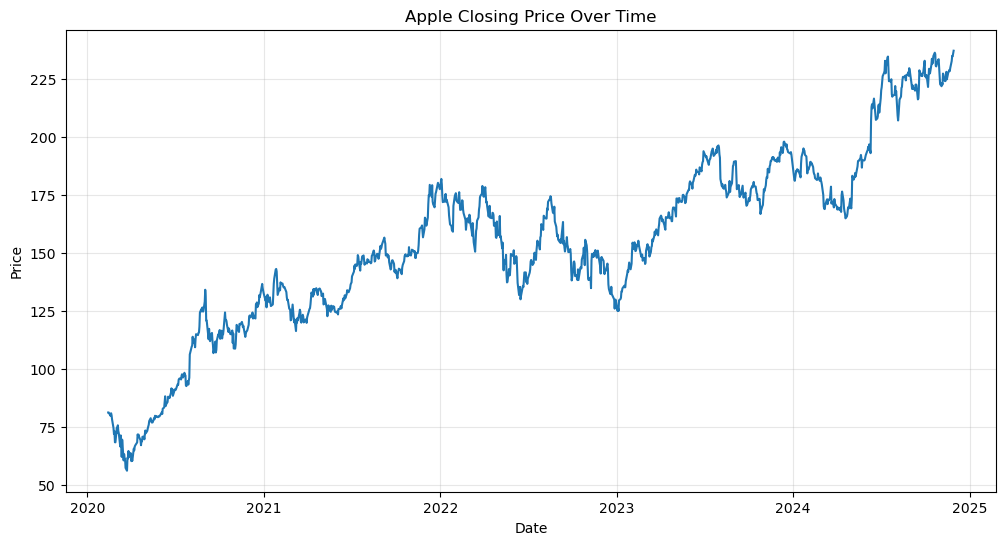

In [64]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title("Apple Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(alpha=0.3)
plt.show()


## Daily Returns

Daily returns measure the percentage change in price from one day to
the next and capture short-term price movements.

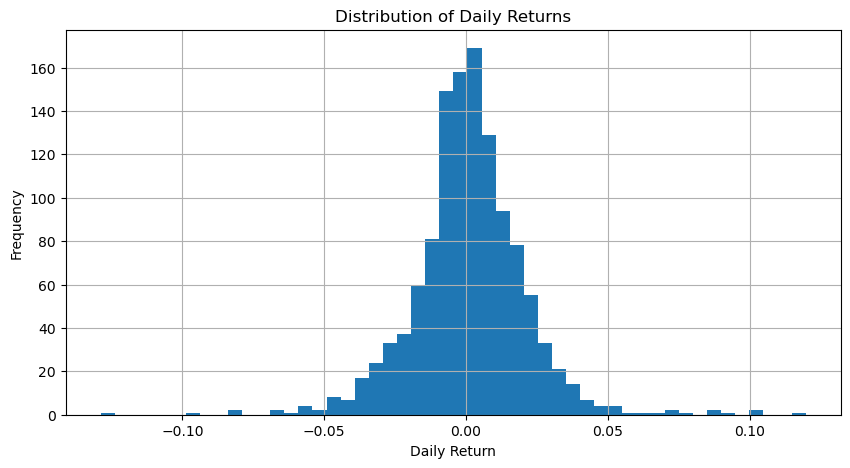

In [65]:
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(10,5))
df['Daily Return'].hist(bins=50)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

## Moving Average Analysis

A 30-day Simple Moving Average (SMA) smooths price fluctuations and
helps identify long-term trends.

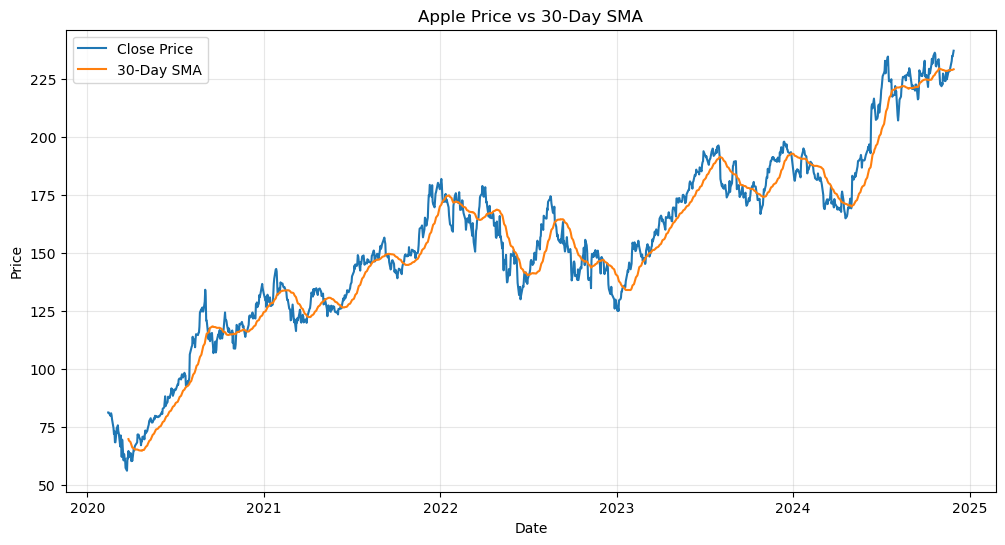

In [66]:
df['SMA_30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_30'], label='30-Day SMA')
plt.legend()
plt.title("Apple Price vs 30-Day SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(alpha=0.3)
plt.show()

When the stock price stays above the moving average, it often indicates
bullish momentum.

## Volatility Analysis

Volatility represents the degree of price fluctuation and is commonly
used as a measure of market risk.

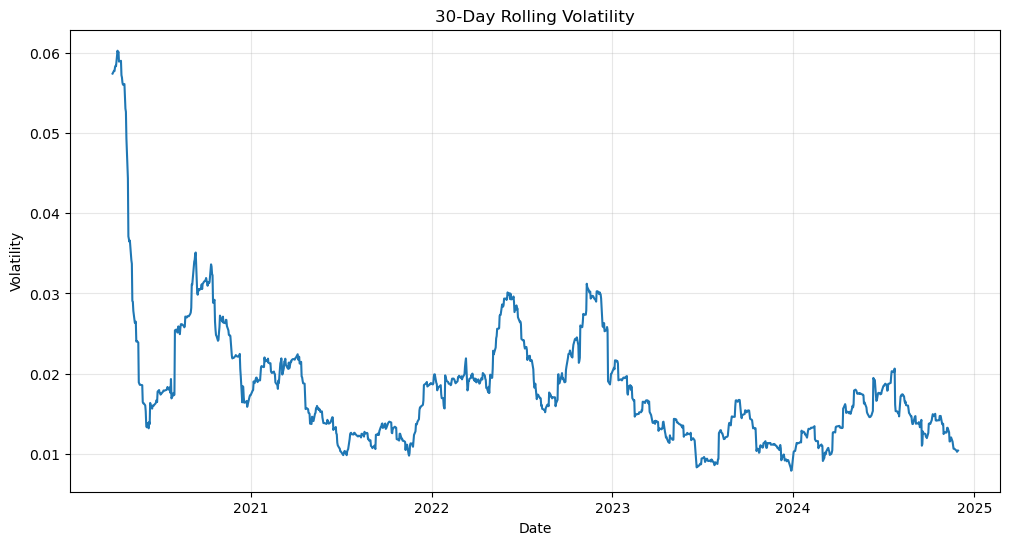

In [67]:
df['Volatility'] = df['Daily Return'].rolling(window=30).std()

plt.figure(figsize=(12,6))
plt.plot(df['Volatility'])
plt.title("30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(alpha=0.3)
plt.show()

Spikes in volatility often occur during periods of market uncertainty
or major economic events.

## Cumulative Returns

Cumulative returns show the total growth of an investment over time,
assuming profits are reinvested.

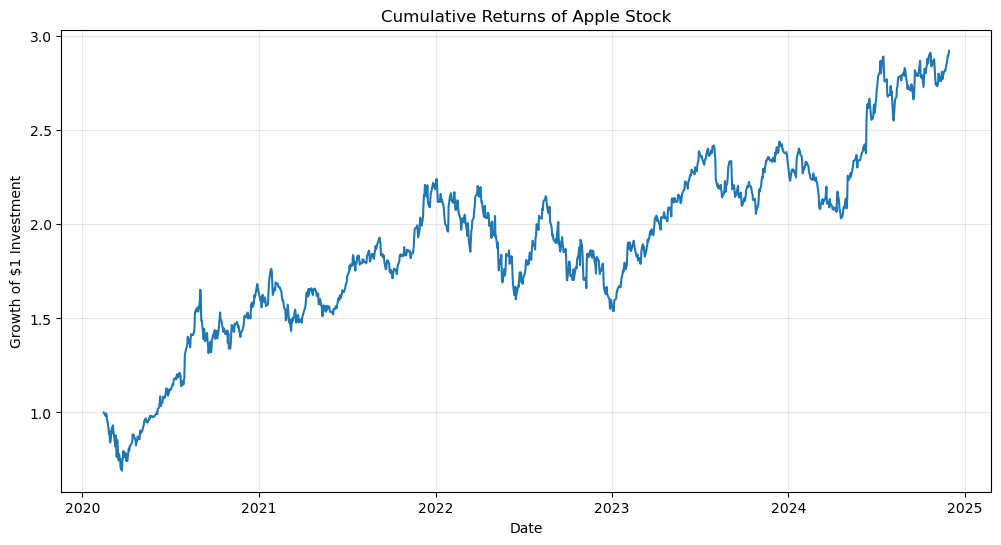

In [68]:
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

plt.figure(figsize=(12,6))
plt.plot(df['Cumulative Return'])
plt.title("Cumulative Returns of Apple Stock")
plt.xlabel("Date")
plt.ylabel("Growth of $1 Investment")
plt.grid(alpha=0.3)
plt.show()


## Key Insights

- Apple demonstrates strong long-term upward price trends
- Volatility increases during periods of market uncertainty
- Moving averages effectively highlight trend direction
- Cumulative returns show significant long-term growth

## Conclusion

This project analyzed Apple’s historical stock performance using
financial metrics such as daily returns, volatility, moving averages,
and cumulative returns.

The analysis shows that Apple has experienced strong long-term growth
despite short-term volatility. Future improvements could include
predictive modeling, risk-adjusted performance metrics, or comparison
with other technology stocks.